In [1]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='452778eb-d85f-4567-a2ee-ae3cf613c834', project_access_token='p-f26ec291e8a83bc0680d8ee012dca78b9d825dfa')
pc = project.project_context


# Predicting Athletes' Success based on Physical Built - Features Transformation

In [2]:
from ibm_botocore.client import Config
import ibm_boto3

In [3]:
SEED = 42

# Numpy
import numpy as np
np.random.seed(SEED)

# Pandas
import pandas as pd

# Sklearn

# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.feature_extraction import DictVectorizer as DV
from sklearn.model_selection import cross_validate, learning_curve, train_test_split

# Metrics and tuning
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.feature_extraction import DictVectorizer as DV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression as LR
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn import svm

import tensorflow as tf
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Stats
from scipy import stats

# Vizualization
import seaborn as sns
sns.set(style="whitegrid")

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Data 

In [4]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_ae9960ddc8814d4c8b5407d633c117e6 = 'https://s3.ap.cloud-object-storage.appdomain.cloud'
else:
    endpoint_ae9960ddc8814d4c8b5407d633c117e6 = 'https://s3.private.ap.cloud-object-storage.appdomain.cloud'

client_ae9960ddc8814d4c8b5407d633c117e6 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='y-i7Ll-_fH7OmwBZU47jYLDcYfCQFgbdSFfHOig9oGAC',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_ae9960ddc8814d4c8b5407d633c117e6)

body = client_ae9960ddc8814d4c8b5407d633c117e6.get_object(Bucket='ibmadvanceddatasciencecapstone-donotdelete-pr-imkca0ueactk84',Key='etl.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,ID,Sex,Age,Height,Weight,Team,Event,Medal
0,1,M,24.0,180.0,80.0,China,Basketball Men's Basketball,0
1,2,M,23.0,170.0,60.0,China,Judo Men's Extra-Lightweight,0
2,5,F,21.0,185.0,82.0,Netherlands,Speed Skating Women's 500 metres,0
3,5,F,21.0,185.0,82.0,Netherlands,"Speed Skating Women's 1,000 metres",0
4,5,F,25.0,185.0,82.0,Netherlands,Speed Skating Women's 500 metres,0


In [5]:
df_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206165 entries, 0 to 206164
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      206165 non-null  int64  
 1   Sex     206165 non-null  object 
 2   Age     206165 non-null  float64
 3   Height  206165 non-null  float64
 4   Weight  206165 non-null  float64
 5   Team    206165 non-null  object 
 6   Event   206165 non-null  object 
 7   Medal   206165 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 12.6+ MB


In [6]:
df_data_1['Sex'] = df_data_1['Sex'].astype('category')
df_data_1['Team'] = df_data_1['Team'].astype('category')
df_data_1['Event'] = df_data_1['Event'].astype('category')

In [7]:
df_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206165 entries, 0 to 206164
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   ID      206165 non-null  int64   
 1   Sex     206165 non-null  category
 2   Age     206165 non-null  float64 
 3   Height  206165 non-null  float64 
 4   Weight  206165 non-null  float64 
 5   Team    206165 non-null  category
 6   Event   206165 non-null  category
 7   Medal   206165 non-null  int64   
dtypes: category(3), float64(3), int64(2)
memory usage: 8.9 MB


In [8]:
df=df_data_1

## Features transformation

Text(0.5, 0, 'Age')

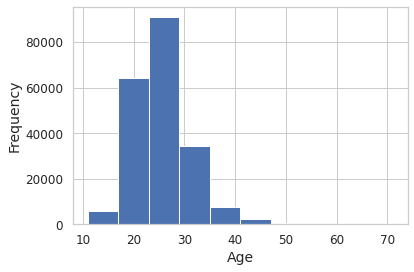

In [9]:
df['Age'].plot.hist()
plt.xlabel('Age', fontsize=14)

Text(0.5, 0, 'Weight')

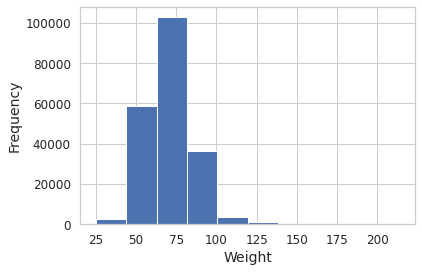

In [10]:
df['Weight'].plot.hist()
plt.xlabel('Weight', fontsize=14)

Text(0.5, 0, 'Height')

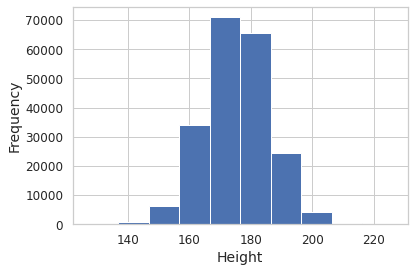

In [11]:
df['Height'].plot.hist()
plt.xlabel('Height', fontsize=14)

The data seem to be slightly screwed, "log(x+1)" transformation is applied.

Text(0.5, 0, 'Age')

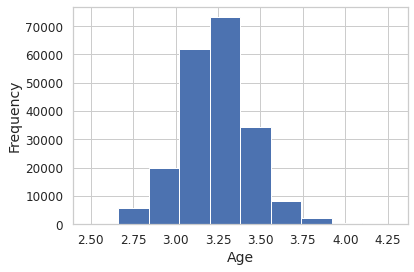

In [12]:
f = df['Age']
f_log = f.map(lambda x: np.log(x+1))
f_log.plot.hist()
plt.xlabel('Age', fontsize=14)

Text(0.5, 0, 'Weight')

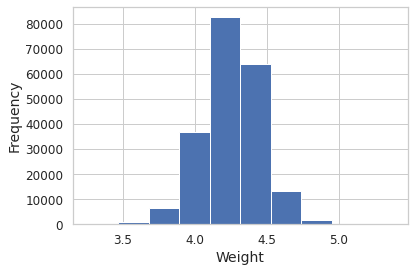

In [13]:
f = df['Weight']
f_log = f.map(lambda x: np.log(x+1))
f_log.plot.hist()
plt.xlabel('Weight', fontsize=14)

Text(0.5, 0, 'Height')

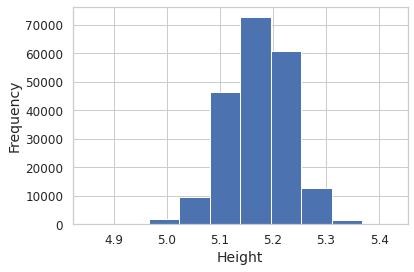

In [14]:
f = df['Height']
f_log = f.map(lambda x: np.log(x+1))
f_log.plot.hist()
plt.xlabel('Height', fontsize=14)

## Separating target

In [15]:
y = df["Medal"]
df = df.drop(columns=["Medal"])
df = df.drop(columns=["ID"])

## One-Hot encoding

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206165 entries, 0 to 206164
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   Sex     206165 non-null  category
 1   Age     206165 non-null  float64 
 2   Height  206165 non-null  float64 
 3   Weight  206165 non-null  float64 
 4   Team    206165 non-null  category
 5   Event   206165 non-null  category
dtypes: category(3), float64(3)
memory usage: 5.8 MB


In [17]:
numeric_cols = ['Age', 'Height', 'Weight']
categorical_cols = list(set(df.columns.values.tolist()) - set(numeric_cols))

In [18]:
data_cat = df[categorical_cols]
data_num = df[numeric_cols]
enc = OneHotEncoder(sparse=False)
data_cat_oh = enc.fit_transform(data_cat)
data_cat_oh.shape

(206165, 1252)

## Splitting dataset
Split our dataset into the train and test sets.

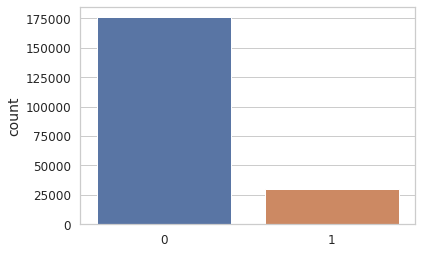

In [19]:
sns.countplot(y.values)

Our classes are not balanced. We can either balance the manually - with over/under sampling. We can also use stratification to be sure that number of class examples are equal in our train and test sets.

In [20]:
(X_train_num, X_test_num, y_train, y_test) = train_test_split(data_num, y, 
                                                              test_size=0.3, 
                                                              random_state=42,
                                                              stratify=y)

(X_train_cat_oh, X_test_cat_oh) = train_test_split(data_cat_oh, 
                                                   test_size=0.3, 
                                                   random_state=42,
                                                   stratify=y)

## Numerical features scaling

In [21]:
scaler = StandardScaler()

X_train_num_scaled = scaler.fit_transform(X_train_num, y_train)
X_test_num_scaled = scaler.transform(X_test_num)

## Creating final train and test datasets

In [22]:
train_data = np.hstack((X_train_num_scaled, X_train_cat_oh))
test_data = np.hstack((X_test_num_scaled, X_test_cat_oh))

## Load data to object storage

In [24]:
project.save_data(data=pd.DataFrame(train_data).to_csv(index=False),file_name='train.csv',overwrite=True)
project.save_data(data=pd.DataFrame(test_data).to_csv(index=False),file_name='test.csv',overwrite=True)
project.save_data(data=pd.DataFrame(y_train).to_csv(index=False),file_name='y_train.csv',overwrite=True)
project.save_data(data=pd.DataFrame(y_test).to_csv(index=False),file_name='y_test.csv',overwrite=True)

{'file_name': 'y_test.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'ibmadvanceddatasciencecapstone-donotdelete-pr-imkca0ueactk84',
 'asset_id': 'caca89e0-b084-4d75-a28b-b029c39e1ae2'}